<a href="https://colab.research.google.com/github/sid661/Heart_Disease_prediction/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**


In [16]:
import pandas as pd


# **Importing the data**

In [17]:
data = pd.read_csv("heart.csv")


## **Taking care of missing values**

In [18]:
data.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## **Taking care of duplicate Values**

In [19]:
data_dup = data.duplicated().any()

In [20]:
data_dup

np.True_

In [21]:
data = data.drop_duplicates()

In [22]:
data_dup = data.duplicated().any()

In [23]:
data_dup

np.False_

## **Data Processing**


In [24]:
categorical_val=[]
numerical_val=[]

for column in data.columns:
  if data[column].nunique() <=10:
    categorical_val.append(column)
  else:
       numerical_val.append(column)

In [25]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [26]:
numerical_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## **Encoding Categorica**l

In [27]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [28]:
data['cp'].unique()

array([0, 1, 2, 3])

In [29]:
categorical_val.remove('sex')
categorical_val.remove('target')

In [30]:
data = pd.get_dummies(data,columns = categorical_val,drop_first=True)

In [31]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False


# **Feature Scaling**

In [32]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
st = StandardScaler()
data[numerical_val] = st.fit_transform(data[numerical_val])

In [35]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False


## **Spliting DataSet Into The Traning Set and Test Set**

In [36]:
x= data.drop('target',axis=1)

In [37]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,True,False,True,False,True,True,False,False,False,False,False,True
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False


In [38]:
y = data['target']

In [39]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
723,1
733,1
739,0
843,0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
Y_train

,target
163,0
291,0
280,1
85,1
239,0
...,...
267,0
77,0
125,1
522,1


In [43]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,True
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,True,False,True,False,True,True,False,False,False,False,False,True
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False


In [44]:
Y_test

,target
245,1
349,0
135,0
389,1
66,1
...,...
402,1
123,1
739,0
274,1


## **Logistic Regression**

In [45]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [48]:
y_pred1 = log.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(Y_test,y_pred1)

0.7868852459016393

## **Support Vector Classifier**

In [51]:
from sklearn import svm

In [52]:
svm = svm.SVC()

In [53]:
svm.fit(X_train,Y_train)

SVC()

In [54]:
y_pred2 = svm.predict(X_test)

In [55]:
accuracy_score(Y_test,y_pred2)

0.8032786885245902

## **KNeighbour Classifier**

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn = KNeighborsClassifier()

In [58]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [59]:
y_pred3 = knn.predict(X_test)

In [60]:
accuracy_score(Y_test,y_pred3)

0.7377049180327869

In [61]:
score = []

for k in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(Y_test,y_pred))

In [62]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [63]:
import matplotlib.pyplot as plt


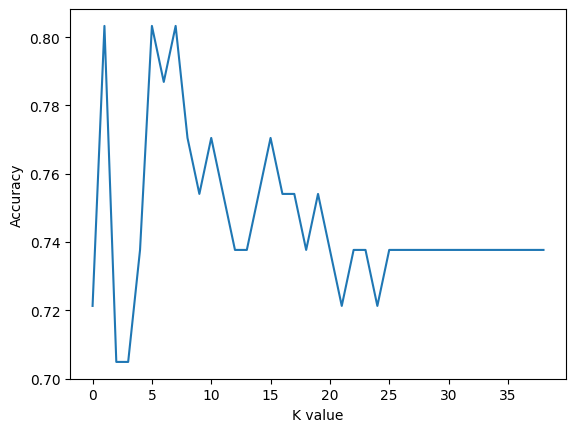

In [64]:
plt.plot(score)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

In [65]:
knn= KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
accuracy_score(Y_test,y_pred)

0.8032786885245902

## **Non Linear ML Algorithm**

In [66]:
data = pd.read_csv("heart.csv")

In [67]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [68]:
data = data.drop_duplicates()

In [69]:
data.shape

(302, 14)

In [70]:
X= data.drop('target',axis=1)
Y= data['target']

In [71]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## **Decision Tree Classifier**

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier()

In [74]:
dt.fit(X_train,Y_train )

DecisionTreeClassifier()

In [75]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [76]:
y_pred4 = dt.predict(X_test)

In [77]:
accuracy_score(Y_test,y_pred4)

0.7213114754098361

## **Random Forest Classfier**

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf = RandomForestClassifier()

In [80]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [83]:
y_pred5= rf.predict(X_test)

In [84]:
accuracy_score(Y_test,y_pred5)

0.8360655737704918

## **Gradient Boosting Classfier**

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbc = GradientBoostingClassifier()

In [87]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [88]:
y_pred6 = gbc.predict(X_test)

In [89]:
accuracy_score(Y_test,y_pred6)

0.819672131147541

In [95]:
final_Data = pd.DataFrame(
    {'Models':['LR','SVM','KNN','DT','RF','GB'],
    'Accuracy':[accuracy_score(Y_test,y_pred1)*100,
                accuracy_score(Y_test,y_pred2)*100,
                accuracy_score(Y_test,y_pred3)*100,
                accuracy_score(Y_test,y_pred4)*100,
                accuracy_score(Y_test,y_pred5)*100,
                accuracy_score(Y_test,y_pred6)*100]
     }
    )

In [96]:
final_Data

,Models,Accuracy
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,72.131148
4,RF,83.606557
5,GB,81.967213


In [97]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='Accuracy'>

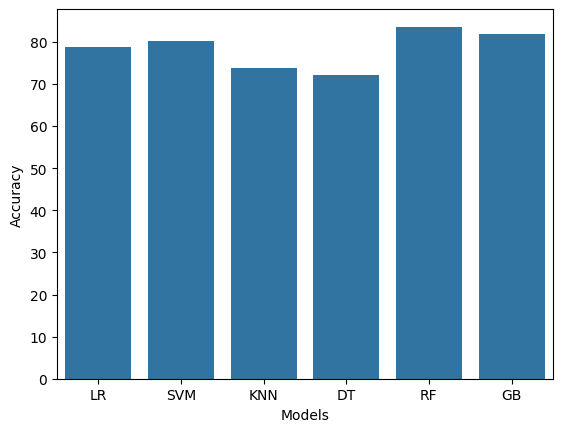

In [101]:
sns.barplot(x='Models',y='Accuracy',data=final_Data)

In [108]:
X=data.drop('target',axis=1)
y=data['target']

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf = RandomForestClassifier()

In [109]:
rf.fit(X,y)

RandomForestClassifier()

## **Prediction on New Data**

In [110]:
import pandas as pd

In [112]:
new_data = pd.DataFrame({
    'age':34,
    'sex':1,
    'cp': 0,
    'trestbps':145,
    'chol':212,
    'fbs' : 0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,},index=[0])

In [113]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,34,1,0,145,212,0,1,168,0,1.0,2,2,3


In [114]:
p = rf.predict(new_data)
if p[0]==0:
    print('Person does not have a Heart Disease')
else:
    print('Person has Heart Disease')

Person does not have a Heart Disease


## **Save Model Using Joblib**

In [115]:
import joblib

In [116]:
joblib.dump(rf,'heart_disease_prediction_model')

['heart_disease_prediction_model']

In [117]:
model = joblib.load('heart_disease_prediction_model')

In [118]:
model.predict(new_data)

array([0])

In [119]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
878,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## **User Interface**

In [121]:
from tkinter import *
import joblib

In [124]:
from tkinter import messagebox

In [123]:
model = joblib.load('heart_disease_prediction_model')


def show_entry_fields():
    try:

        p1 = int(e1.get())
        p2 = int(e2.get())
        p3 = int(e3.get())
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = int(e8.get())
        p9 = int(e9.get())
        p10 = float(e10.get())
        p11 = int(e11.get())
        p12 = int(e12.get())
        p13 = int(e13.get())

        result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])

        if result[0] == 0:
            result_label.config(
                text="✅ No Heart Disease Detected",
                fg="#00FFB3",
                bg="#2c2f33"
            )
        else:
            result_label.config(
                text="⚠️ Possibility of Heart Disease",
                fg="#FF4B5C",
                bg="#2c2f33"
            )
    except Exception as ex:
        messagebox.showwarning("Input Error", "Please enter valid numeric values.")


master = Tk()
master.title("Heart Disease Predictor")
master.geometry("600x750")
master.configure(bg="#23272a")


banner = Label(
    master,
    text="❤️ Heart Disease Predictor ❤️",
    font=("Helvetica", 24, "bold"),
    fg="white",
    bg="#7289da",
    pady=20
)
banner.pack(fill=X)


form_frame = Frame(master, bg="#2c2f33", padx=30, pady=30)
form_frame.pack(pady=30)


fields = [
    "Enter Your Age",
    "Male Or Female [1/0]",
    "Enter Value of CP",
    "Enter Value of trestbps",
    "Enter Value of chol",
    "Enter Value of fbs",
    "Enter Value of restecg",
    "Enter Value of thalach",
    "Enter Value of exang",
    "Enter Value of oldpeak",
    "Enter Value of slope",
    "Enter Value of ca",
    "Enter Value of thal"
]

entries = []


for i, field in enumerate(fields):
    lbl = Label(
        form_frame,
        text=field,
        anchor="w",
        bg="#2c2f33",
        fg="#ffffff",
        font=("Helvetica", 10, "bold")
    )
    lbl.grid(row=i, column=0, sticky=W, pady=8)

    ent = Entry(
        form_frame,
        width=30,
        font=("Helvetica", 12),
        bg="#23272a",
        fg="#00FFB3",
        insertbackground="#00FFB3",
        relief=FLAT,
        highlightthickness=1,
        highlightbackground="#7289da",
        highlightcolor="#7289da"
    )
    ent.grid(row=i, column=1, pady=8, ipady=5)
    entries.append(ent)

(e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13) = entries


def on_enter(e):
    predict_button.config(bg="#99aab5")

def on_leave(e):
    predict_button.config(bg="#7289da")

predict_button = Button(
    master,
    text="PREDICT NOW",
    command=show_entry_fields,
    bg="#7289da",
    fg="white",
    font=("Helvetica", 14, "bold"),
    relief=FLAT,
    padx=20,
    pady=10,
    activebackground="#99aab5"
)
predict_button.pack(pady=20)

predict_button.bind("<Enter>", on_enter)
predict_button.bind("<Leave>", on_leave)


result_label = Label(
    master,
    text="",
    font=("Helvetica", 16, "bold"),
    bg="#2c2f33",
    fg="white",
    wraplength=500,
    justify=CENTER,
    padx=20,
    pady=20
)
result_label.pack(pady=30)

master.mainloop()

TclError: no display name and no $DISPLAY environment variable